### Setup

In [54]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(r"styles/deeplearning.mplstyle")
from utils.lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

### Dataset

In [55]:
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([1.0, 4.0, 9.0])

### Cost Function

In [56]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    
    total_cost = 1 / (2 * m) * cost
    return total_cost

## Implement Gradient Descent

### compute_gradient

In [57]:
def compute_gradient(x, y, w, b):
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b

        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

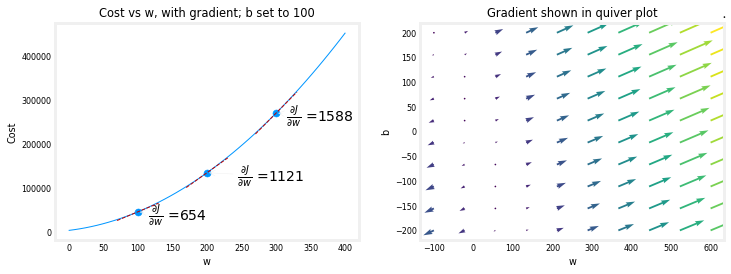

In [58]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

### Gradient Descent

##### Equation 3

\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}

In [59]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
        x (ndarray (m,))  : Data, m examples 
        y (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters  
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        gradient_function: function to call to produce gradient
      
    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b] 
    """

    w = copy.deepcopy(w_in) # avoid modifying global w_in

    # An array to store cost J and w's at each iteration primarily for graphing later
    j_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_funtion
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000: # Prevent resource exhaustion
            j_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ",
                  f"w: {w: 0.3e}, b: {b: 0.5e}")

    return w, b, j_history, p_history # return w and J,w history for graphing


In [60]:
# initialise parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 1000000
tmp_alpha = 1.0e-3

# run gradient descent
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 1.62e+01  dj_dw: -1.200e+01, dj_db: -4.667e+00  w:  1.200e-02, b:  4.66667e-03
Iteration 100000: Cost 1.11e-01  dj_dw: -1.358e-06, dj_db:  3.088e-06  w:  4.000e+00, b: -3.33331e+00
Iteration 200000: Cost 1.11e-01  dj_dw: -8.215e-12, dj_db:  1.859e-11  w:  4.000e+00, b: -3.33333e+00
Iteration 300000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 400000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 500000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 600000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 700000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 800000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00, b: -3.33333e+00
Iteration 900000: Cost 1.11e-01  dj_dw: -2.217e-13, dj_db:  2.220e-13  w:  4.000e+00

#### Cost versus iterations of gradient descent

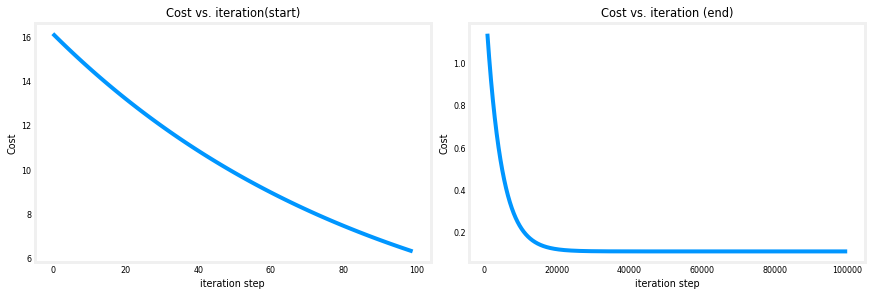

In [61]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel("Cost"); ax2.set_ylabel("Cost")
ax1.set_xlabel("iteration step"); ax2.set_xlabel("iteration step")

plt.show()


#### Predictions

In [62]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 0.7 Thousand dollars
1200 sqft house prediction 1.5 Thousand dollars
2000 sqft house prediction 4.7 Thousand dollars


#### Plotting

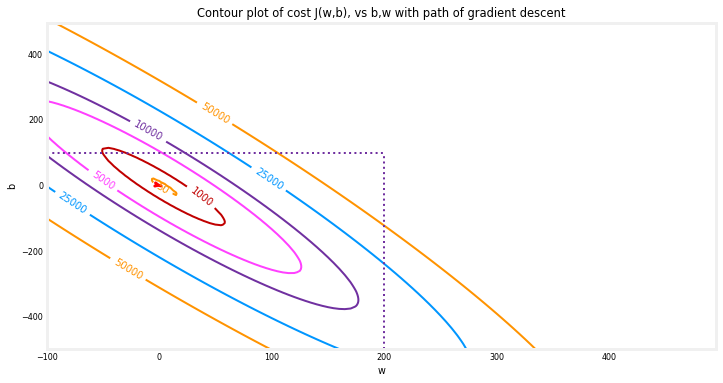

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

/home/mehul/Documents/Machine Learning/Machine Learning Week 1/utils/lab_utils_uni.py:258: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(w0, b0, z, contours, linewidths=2,


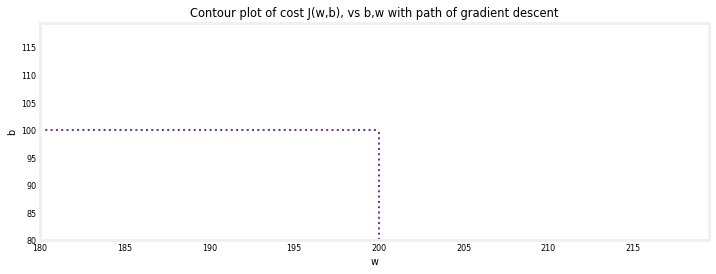

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
                  contours=[1, 5, 10, 20], resolution=0.5)

In [65]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.77e+02  dj_dw: -1.200e+01, dj_db: -4.667e+00  w:  9.600e+00, b:  3.73333e+00
Iteration    1: Cost 2.08e+03  dj_dw:  4.027e+01, dj_db:  1.827e+01  w: -2.261e+01, b: -1.08800e+01
Iteration    2: Cost 2.46e+04  dj_dw: -1.393e+02, dj_db: -6.077e+01  w:  8.882e+01, b:  3.77387e+01
Iteration    3: Cost 2.91e+05  dj_dw:  4.780e+02, dj_db:  2.107e+02  w: -2.936e+02, b: -1.30827e+02
Iteration    4: Cost 3.43e+06  dj_dw: -1.644e+03, dj_db: -7.226e+02  w:  1.021e+03, b:  4.47249e+02
Iteration    5: Cost 4.06e+07  dj_dw:  5.649e+03, dj_db:  2.485e+03  w: -3.498e+03, b: -1.54089e+03
Iteration    6: Cost 4.79e+08  dj_dw: -1.942e+04, dj_db: -8.541e+03  w:  1.203e+04, b:  5.29162e+03
Iteration    7: Cost 5.66e+09  dj_dw:  6.673e+04, dj_db:  2.936e+04  w: -4.135e+04, b: -1.81939e+04
Iteration    8: Cost 6.69e+10  dj_dw: -2.294e+05, dj_db: -1.009e+05  w:  1.422e+05, b:  6.25290e+04
Iteration    9: Cost 7.90e+11  dj_dw:  7.884e+05, dj_db:  3.468e+05  w: -4.886e+05, b: -2.14931e+05


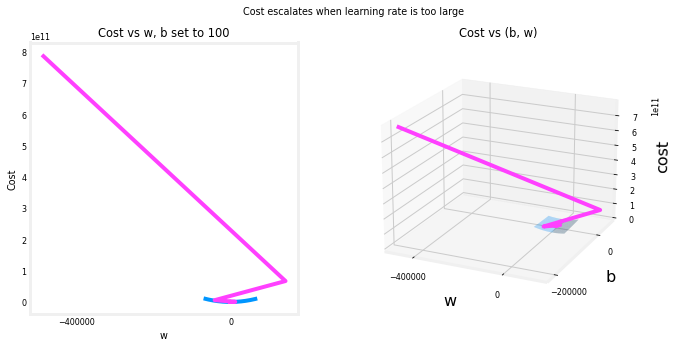

In [66]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()